<a href="https://colab.research.google.com/github/EddyGiusepe/Keras_CNN_MNIST/blob/main/Keras_CNN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Criando uma Rede Neural Convoluvional (CNN) para reconhecimento de escrita a mão**

RECOMENDO FORTEMENTE ASSISTIR ESTE VÍDEO!

Já que ele faz uma abordagem muito boa da teoria e logo realiza o exemplo que desenvolveremos a continuação.


Neste vídeo se faz uma abordagem um pouco diferente: [click aqui](https://www.youtube.com/watch?v=FhwzOaEMk6Y&t=3129s).


Este é um exemplo de aprendizado supervisionado. 

**nota:**

Seguindo o vídeo me deu um erro de formato em nossos Dados.
Tipo (1, 28, 28) --> (28, 28, 1).

A dica está [aqui](https://stackoverflow.com/questions/64666638/invalidargumenterror-default-maxpoolingop-only-supports-nhwc-on-device-type-cpu)

## Importamos a nossas livrarias

In [1]:
from keras.datasets import mnist # Conjunto de Dados do MNIST 
from keras.models import Sequential # Permite montar nossos steps de camadas
from keras.layers import Dense # Nos permite criar as nossas camadas Densas
from keras.layers import Dropout # É a regularização
from keras.layers import Flatten # Operação de achatamento
from keras.layers.convolutional import Conv2D # Faz a convolução em nosso Dados de entrada
from keras.layers.convolutional import MaxPooling2D 


import numpy as np
from matplotlib import pyplot as plt 
%matplotlib inline 

from keras.utils import np_utils
import cv2 # Pacote de visão computacional

#from keras import backend as K

#K.set_image_data_format('channels_first')


## Dividimos nossos Dados em um conjunto de Dados de Treino e Dados de teste.

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32') # Não --> (60000,1, 28, 28)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32') # Não --> (10000,1, 28, 28)


In [3]:
print(len(x_train))
print("")
print(len(x_train))
print("")
print(len(y_test))

60000

60000

10000


In [4]:
print(x_train.shape)

(60000, 28, 28, 1)


In [5]:
x_test.shape

(10000, 28, 28, 1)

In [6]:
# Nossos Dados estra de 0 a 255
print(x_train[-1])

[[[  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]]

 [[  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]]

 [[  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]]

 [[  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [ 

In [7]:
# Redimensionamos
# Inves de estar entre 0 - 255
# fazemos de 0 - 1

x_train = x_train/255
x_test = x_test/255


In [8]:
# Agora vamos a converter nosso vetor para uma matriz Multiclasse.
print(y_train)

[5 0 4 ... 5 6 8]


In [9]:
# convertendo para valores CATEGÓRICOS
y_train = np_utils.to_categorical(y_train)

# Vejamos agora:
print(y_train)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [10]:
#  De igual maneira para meu comjunto de teste

y_test = np_utils.to_categorical(y_test)

In [11]:
print(y_test)

[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [12]:
# Número de classes (são de 0 ate 9)

num_classes = y_test.shape[1]
print(num_classes)

10


## Construímos a nossa Rede Neural

In [13]:
model = Sequential()

model.add(Conv2D(30, (5, 5), input_shape=(28, 28, 1), activation='relu'))
# (1, 28, 28)--> 1 significa na escala de cinza (um canal)
# Camada que vai gerar 30 feature math e com "Kernel" 5x5

model.add(MaxPooling2D(pool_size=(2, 2))) # Chamada: Camada de ajustamento  
# pool_size --> Tamanho da janela da amostra
###########################
# Adicionamos mais camadas para MELHORAR nossa RED e por ende nossos resultados
model.add(Conv2D(15, (3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
###########################
model.add(Dropout(0.20))
# Incluimos a técnica de regularização, a qual consiste me desligar alguns neurônios da 
# rede, maneira aleatoria. Para que eles não se ajustem demais aos Dados de treino 

model.add(Flatten())
# achatamos nossos Dados

model.add(Dense(128, activation='relu'))
# 128 --> Neurônios
# Podemos adicionar mais camadas "Dense", não é obrigatório colocar apenas uma
# Então, colocamos a continuação algumas
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))

model.add(Dense(num_classes, activation='softmax', name='predict'))
# Saída (última camada)
# Esta camada tem quantidade de neurônios igual à quantidade de classes que tenho
# Aqui também damos um nome a nossa camada: 'predict' 


In [14]:
# Consolidamos a nossa arquitetura com o método "compile"
# O objetivo da nossa CNN é diminuir o erro de classificação
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])


# Vejamos o resumo da nossa CNN, para isso utilizamos o método "summary"
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 30)        780       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 30)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 15)        4065      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 15)          0         
_________________________________________________________________
dropout (Dropout)            (None, 5, 5, 15)          0         
_________________________________________________________________
flatten (Flatten)            (None, 375)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               4

**NOTA:**

Vocês irão notar que apenas uma camada convolucional e uma de subamostragem não foi o suficiente e o modelo não ficou bom. Foi preciso fazer um ajuste na arquitetura da nossa CNN, adicionando uma camada convolucional e outra de subamostragem.

## Treinamos nossa CNN

In [15]:
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=200, verbose=1) 


Epoch 1/10
300/300 [==============================] - 36s 120ms/step - loss: 0.9463 - accuracy: 0.6687 - val_loss: 0.0833 - val_accuracy: 0.9741
Epoch 2/10
300/300 [==============================] - 36s 119ms/step - loss: 0.1120 - accuracy: 0.9658 - val_loss: 0.0511 - val_accuracy: 0.9835
Epoch 3/10
300/300 [==============================] - 36s 119ms/step - loss: 0.0755 - accuracy: 0.9760 - val_loss: 0.0391 - val_accuracy: 0.9872
Epoch 4/10
300/300 [==============================] - 36s 119ms/step - loss: 0.0574 - accuracy: 0.9824 - val_loss: 0.0346 - val_accuracy: 0.9884
Epoch 5/10
300/300 [==============================] - 36s 119ms/step - loss: 0.0513 - accuracy: 0.9839 - val_loss: 0.0289 - val_accuracy: 0.9909
Epoch 6/10
300/300 [==============================] - 36s 119ms/step - loss: 0.0424 - accuracy: 0.9860 - val_loss: 0.0342 - val_accuracy: 0.9892
Epoch 7/10
300/300 [==============================] - 36s 119ms/step - loss: 0.0377 - accuracy: 0.9875 - val_loss: 0.0301 - val_ac

In [16]:
# Vamos medir a accuracy
# Utilizamos o método "evaluate"
scores = model.evaluate(x_test, y_test, verbose=1)

313/313 [==============================] - 3s 9ms/step - loss: 0.0267 - accuracy: 0.9908


In [17]:
print("\nA nossa precisão (accuracy) é: % 0.2f %%" % (scores[1]*100))


A nossa precisão (accuracy) é:  99.08 %


## Agora vamos a testar nosso modelo com NOVOS NÚMEROS (números que estão em nossa pasta)


### Identificando o QUATRO:

In [36]:
# Carregamos nossa primeira imagem (o número "4")
# Utilizamos "cv2" para isso
# carregamos na escala de cinza
img_pred = cv2.imread("/content/drive/MyDrive/Apenas_TensorFlow_Eddy/Deep_Learning_Keras_Reconhecimento_CNN/number-four.png", 0)

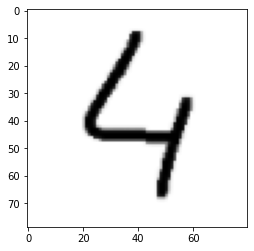

In [37]:
# Logo plotamos
# TEMOS QUE PREDEZIR ESTE NÚMERO COM NOSSO MODELO !
plt.imshow(img_pred, cmap='gray')

In [38]:
# Primeiro: vamos adequar esta imagem à escala de nosso modelo, de 28x28

if img_pred.shape != [28, 28]:
  img2 = cv2.resize(img_pred, (28, 28))
  img_pred = img2.reshape(28, 28, 1)
else:
  img_pred = img_pred.reshape(28, 28, 1)  


img_pred = img_pred.reshape(1, 28, 28, 1)




In [39]:
print(img_pred.shape)

(1, 28, 28, 1)


In [40]:
# Predizimos agora:

pred = model.predict_classes(img_pred)

pred_proba = model.predict_proba(img_pred)
pred_proba = "%0.2f%%" % (pred_proba[0][pred]*100) 

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


In [42]:
# Veremos que ele não predize corretamente o "4" ao início
# Depois de adicionar mais duas camadas, nosso modelo predize corretamente o "4"

print(pred[0], "Com probabilidade de: ", pred_proba)


4 Com probabilidade de:  100.00%


### Identificando o CINCO:

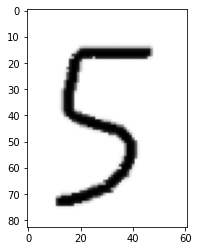

In [43]:
img_pred = cv2.imread("/content/drive/MyDrive/Apenas_TensorFlow_Eddy/Deep_Learning_Keras_Reconhecimento_CNN/number-five.png", 0)

plt.imshow(img_pred, cmap='gray')

In [44]:
if img_pred.shape != [28, 28]:
  img2 = cv2.resize(img_pred, (28, 28))
  img_pred = img2.reshape(28, 28, 1)
else:
  img_pred = img_pred.reshape(28, 28, 1)  


img_pred = img_pred.reshape(1, 28, 28, 1)


In [45]:
print(img_pred.shape)

(1, 28, 28, 1)


In [46]:
# Predizimos agora:

pred = model.predict_classes(img_pred)

pred_proba = model.predict_proba(img_pred)
pred_proba = "%0.2f%%" % (pred_proba[0][pred]*100) 

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


In [47]:
print(pred[0], "Com probabilidade de: ", pred_proba)

5 Com probabilidade de:  100.00%
